In [14]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import regex as re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
os.chdir('/Users/gil/Desktop/notebooks/DSI-US-4/Project3')

## Refer to the Comment NLP Model -004 for markdown as its the same process for this notebook

In [3]:
reply = pd.read_csv('./replies_nlp.csv')

In [4]:
reply.head()

,Replies,class
0,"['>much ado about nothing\n\nVery clever', 'Bu...",1
1,"['I mean, he feels that way too. But because ...",1
2,['A fair question that you already know the an...,1
3,[],1
4,['What are you doing? Are you registering vote...,1


In [6]:
dem = reply.loc[reply['class'] == 1]
repu = reply.loc[reply['class'] == 0]

In [8]:
dem_freq = []
for i in range(0,994):
    dem_freq.append(dem['Replies'][i])
dem_freq_norm = []
for i in range(0,994):
    dem_freq_norm.append(re.sub("[^a-zA-Z]"," ",dem_freq[i] ))
repu_freq = []
for i in range(0,633):
    repu_freq.append(dem['Replies'][i])
repu_freq_norm = []
for i in range(0,633):
    repu_freq_norm.append(re.sub("[^a-zA-Z]"," ",repu_freq[i] ))


In [9]:
dem_str = (''.join(dem_freq_norm))
words = dem_str.lower().split()
stops = set(stopwords.words('english'))
meaningful_words = [w for w in words if not w in stops]
dem_str_2 = (" ".join(meaningful_words))
repu_str = (''.join(repu_freq_norm))
words = repu_str.lower().split()
stops = set(stopwords.words('english'))
meaningful_words = [w for w in words if not w in stops]
repu_str_2 = (" ".join(meaningful_words))

In [10]:
corpus = [dem_str_2,repu_str_2]

In [11]:
tvec = TfidfVectorizer()
tvec.fit(corpus)
df  = pd.DataFrame(tvec.transform(corpus).todense(),
                   columns=tvec.get_feature_names(),
                   index=['Dem', 'Repu'])

df.transpose().sort_values('Dem', ascending=False).head(20)

,Dem,Repu
trump,0.334908,0.378903
people,0.300354,0.297557
like,0.259155,0.252602
would,0.180744,0.181959
right,0.167454,0.149849
think,0.151506,0.134864
get,0.150177,0.151989
one,0.139545,0.124160
democrats,0.119610,0.107035
us,0.112965,0.122020


In [12]:
sorted_df = df.transpose()
sorted_df['dif'] = abs(sorted_df['Dem'] - sorted_df['Repu'])
sorted_df.sort_values('dif', ascending=False).head(10)

,Dem,Repu,dif
trump,0.334908,0.378903,0.043995
republicans,0.089043,0.066362,0.022681
make,0.083727,0.102753,0.019026
policy,0.037212,0.055658,0.018446
nhttps,0.033225,0.014985,0.018240
go,0.078411,0.096331,0.017920
right,0.167454,0.149849,0.017605
two,0.034554,0.017126,0.017428
political,0.038541,0.021407,0.017134
want,0.066450,0.083487,0.017037


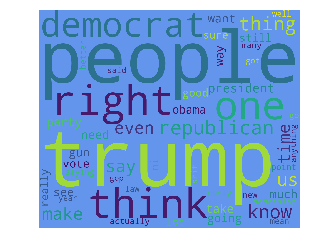

In [15]:
wordcloud = WordCloud(max_words=50,
                        background_color='cornflowerblue',
                          width=1200,
                          height=1000
                         ).generate(dem_str_2)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

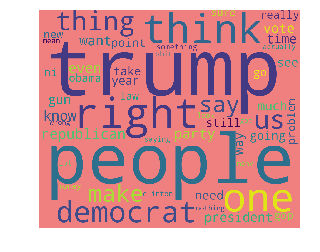

In [16]:
wordcloud = WordCloud(max_words=50,
                        background_color='lightcoral',
                          width=1200,
                          height=1000
                         ).generate(repu_str_2)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
X = title['Replies']
y = title['class']

In [31]:
for i in range(0,1627):
    X[i] = re.sub("[^a-zA-Z]"," ",X[i].lower())

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
tvec = TfidfVectorizer(stop_words='english')
X_train_counts = tvec.fit_transform(X_train)
X_test_counts = tvec.transform(X_test)

In [27]:
lr = LogisticRegression()
log_params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
gs=GridSearchCV(lr , param_grid=log_params)
gs.fit(X_train_counts, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6100917431192661
{'C': 1, 'penalty': 'l2'}


In [22]:
log_reg = LogisticRegression(C=100,penalty='l2')
log_reg.fit(X_train_counts, y_train)
log_reg.score(X_test_counts, y_test)

0.62756052141527

In [23]:
rf = RandomForestClassifier()
rf_params = {'n_estimators': [5,6,7,8,9,10],'max_features':[2,3,4,5,6,7,8,9],'max_depth':[None,2,3,4]}
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train_counts,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6302752293577981
{'max_depth': None, 'max_features': 5, 'n_estimators': 6}


In [24]:
rf_2 = RandomForestClassifier(max_depth=None,max_features=9,n_estimators=9)
rf_2.fit(X_train_counts,y_train)
rf_2.score(X_test_counts,y_test)

0.5940409683426443